<a href="https://colab.research.google.com/github/Anlu-Chen/TFG/blob/main/Termograf%C3%ADas_1D_CNN(borrador01).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import time as time
from tensorflow.keras.callbacks import LearningRateScheduler
import math
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#modificar esto al lugar donde se tenga la base de datos
training_data=np.loadtxt('/content/drive/My Drive/train_experiments7.1.csv', delimiter=';')
training_solutions=np.loadtxt('/content/drive/My Drive/train_solutions7.1.csv',delimiter=';')
test_data=np.loadtxt('/content/drive/My Drive/test_experiments7.1.csv',delimiter=';')
test_solutions=np.loadtxt('/content/drive/My Drive/test_solutions7.1.csv',delimiter=';')

In [3]:
#reordenamos los datos de entrenamiento
print(training_data.shape)
training_data_new=np.reshape(training_data,(training_data.shape[0]*15,1001,1))  
del training_data
#el 1 al final es necesario para indicar a la CNN que nuestro modelo es plano, (1D o 2D).
print(training_data_new.shape)

print(test_data.shape)
test_data_new=np.reshape(test_data,(test_data.shape[0]*15,1001,1))
del test_data
print(test_data_new.shape)

(5600, 15015)
(84000, 1001, 1)
(840, 15015)
(12600, 1001, 1)


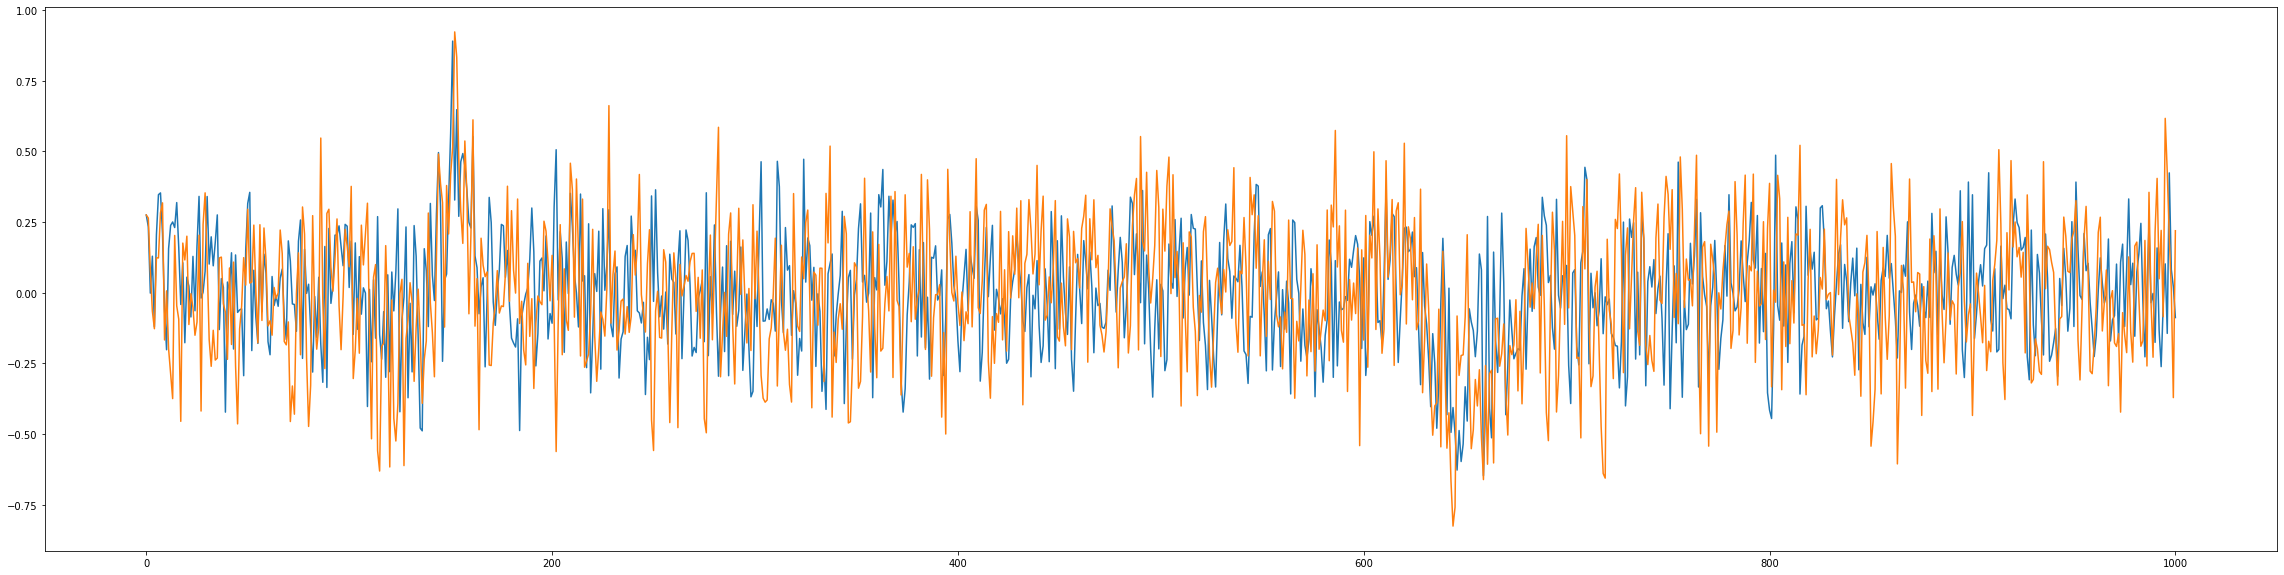

In [4]:
# Al recolocar el training_data y test_data, tenemos que dar la forma a las
# training_solutions y test_solutions correspondientes y como corresponden a la misma
# solucion cada 15 set de datos, realizamos el siguiente codigo.
training_solutions_new=np.zeros(5600*15)
for i in range(0,5600):
  for j in range(0,15):
    training_solutions_new[i*15+j]=training_solutions[i]
del training_solutions

test_solutions_new=np.zeros(840*15)
for i in range(0,840):
  for j in range(0,15):
    test_solutions_new[i*15+j]=test_solutions[i]    
del test_solutions

#print(training_solutions_new[:3*15]) 
#print(training_solutions_new[-3*15:]) 

#print(test_data[0,:100]) ; print(test_data[1,:100])
x=np.zeros(1001)
y=np.zeros(1001)
z=np.zeros(1001)
for i in range (0,1001):
  x[i]=i
y=training_data_new[0]
z=training_data_new[1]
fig, ax = plt.subplots(figsize = (40, 10))
plt.plot(x,y)
plt.plot(x,z)
plt.show()
#vemos como se muestran las termografias con el mismo defecto pero diferente ruido


In [5]:
print(training_data_new.shape)
print(training_solutions_new.shape)
print(test_data_new.shape)
print(test_solutions_new.shape)
print(training_data_new[0].shape)

(84000, 1001, 1)
(84000,)
(12600, 1001, 1)
(12600,)
(1001, 1)



Epoch 00001: LearningRateScheduler reducing learning rate to 0.3.
Epoch 1/15
8400/8400 [==============================] - 156s 19ms/step - loss: 0.0092 - mae: 0.0750 - val_loss: 0.0050 - val_mae: 0.0541

Epoch 00002: LearningRateScheduler reducing learning rate to 0.25821239292751735.
Epoch 2/15
8400/8400 [==============================] - 157s 19ms/step - loss: 0.0076 - mae: 0.0682 - val_loss: 0.0049 - val_mae: 0.0528

Epoch 00003: LearningRateScheduler reducing learning rate to 0.22224546620451535.
Epoch 3/15
8400/8400 [==============================] - 157s 19ms/step - loss: 0.0071 - mae: 0.0654 - val_loss: 0.0049 - val_mae: 0.0513

Epoch 00004: LearningRateScheduler reducing learning rate to 0.19128844548653198.
Epoch 4/15
8400/8400 [==============================] - 158s 19ms/step - loss: 0.0063 - mae: 0.0615 - val_loss: 0.0045 - val_mae: 0.0498

Epoch 00005: LearningRateScheduler reducing learning rate to 0.16464349082820792.
Epoch 5/15
8400/8400 [==============================]

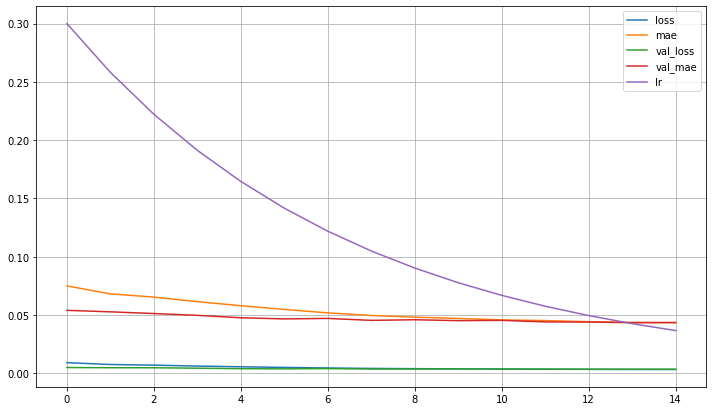

39.42204355398814 
 minutos ha durado


In [36]:
# Entrenamiento de red CNN.
tic=time.time()

model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(64,2, input_shape=(training_data_new[0].shape)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('elu'),
        #tf.keras.layers.MaxPooling1D(2),
        tf.keras.layers.Conv1D(64,2),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('elu'),
        #tf.keras.layers.MaxPooling1D(10),
        #tf.keras.layers.Conv1D(64,2),
        #tf.keras.layers.BatchNormalization(),
        #tf.keras.layers.Activation('elu'),
        #tf.keras.layers.MaxPooling1D(10),
        tf.keras.layers.Flatten(),
        #Fully-connected:
        tf.keras.layers.Dense(2048,kernel_initializer='random_normal',bias_initializer='zeros', use_bias=True),
        #tf.keras.layers.Dropout(0.5),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('elu'),
        tf.keras.layers.Dense(1024, use_bias=True),
        #tf.keras.layers.Dropout(0.5),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('elu'),
        tf.keras.layers.Dense(512, use_bias=True),
        #tf.keras.layers.Dropout(0.5),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('elu'),
        tf.keras.layers.Dense(256, use_bias=True),
        #tf.keras.layers.Dropout(0.5),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('elu'),
        tf.keras.layers.Dense(128, use_bias=True),
        #tf.keras.layers.Dropout(0.5),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('elu'),
        tf.keras.layers.Dense(64, use_bias=True),
        #tf.keras.layers.Dropout(0.5),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('elu'),
        tf.keras.layers.Dense(32, use_bias=True),
        #tf.keras.layers.Dropout(0.5),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('elu'),
        tf.keras.layers.Dense(1, use_bias=True),
        tf.keras.layers.Activation('sigmoid')
])
############################################################################
# Compilamos el modelo
model.compile(
    optimizer='sgd',
    loss='mse', 
    metrics=['mae'])

# Definimos como va a ser el ratio de aprendizaje exponencial.
initial_learning_rate = 0.3
def lr_exp_decay(epoch, lr):
    k = 0.15
    return initial_learning_rate * math.exp(-k*epoch)

# Ajustamos el modelo.
history = model.fit(
    training_data_new, 
    training_solutions_new, 
    epochs=15, 
    validation_data=(test_data_new, test_solutions_new),
    batch_size=10,
    callbacks=[LearningRateScheduler(lr_exp_decay, verbose=1)],
)
############################################################################
# Pintamos el modelo
model.summary() 
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(12,7))
plt.grid(True)
plt.show()

toc=time.time()
print((toc-tic)/60,'\n minutos ha durado')

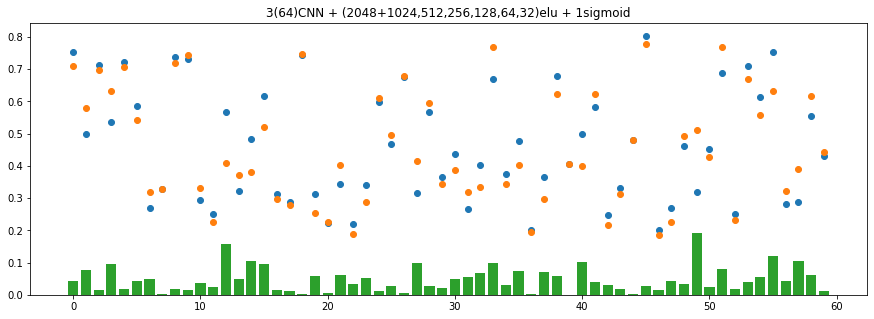

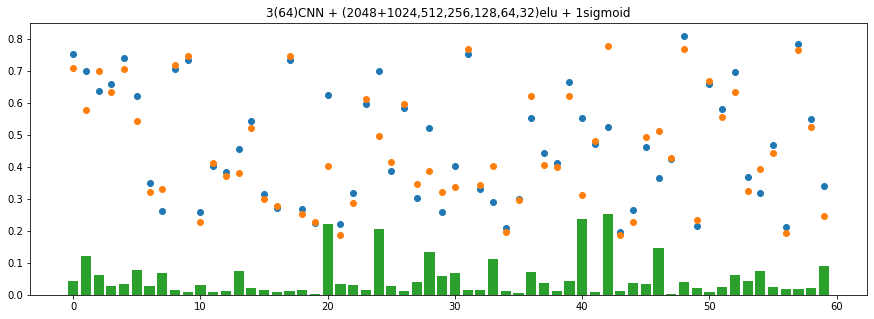

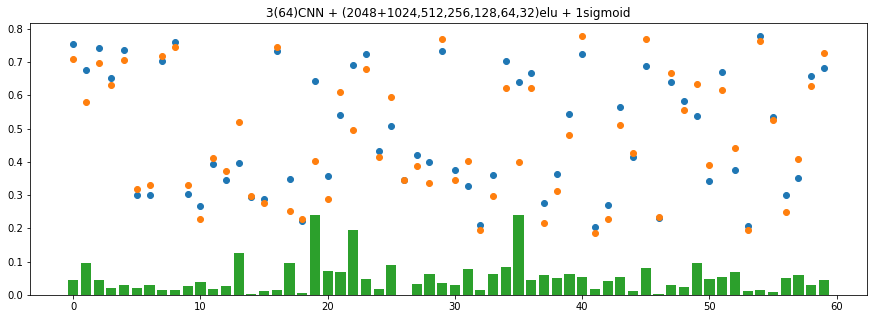

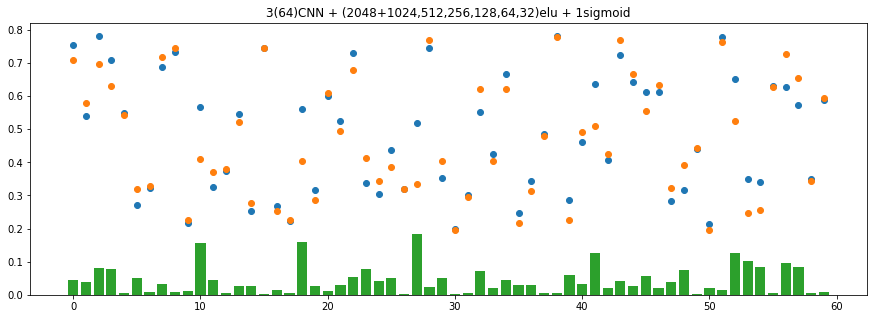

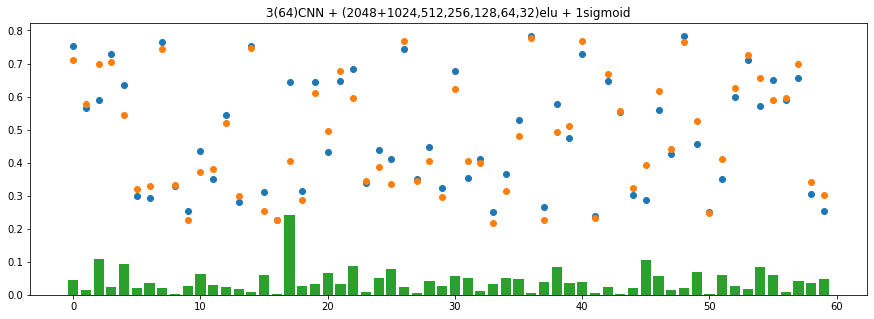

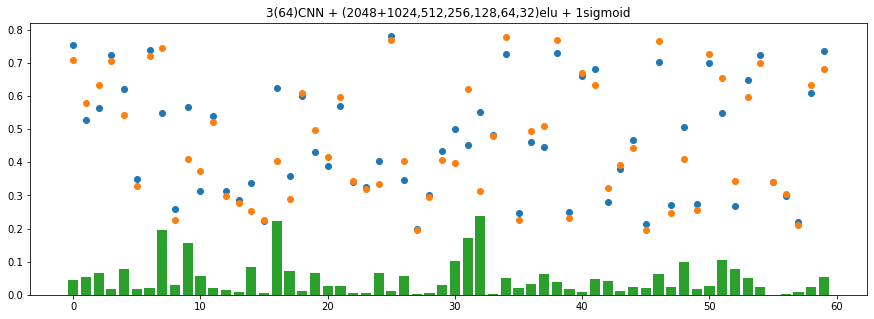

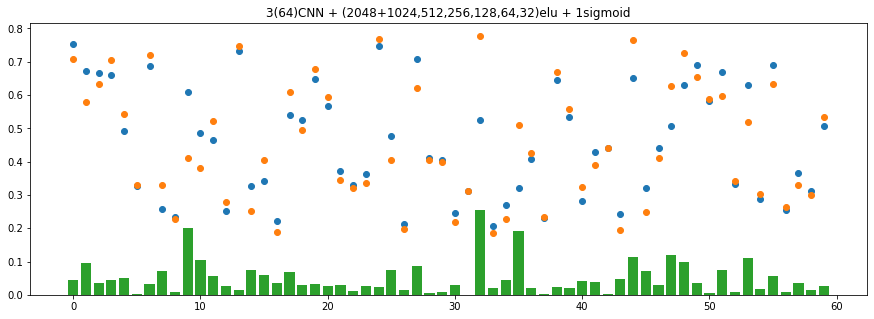

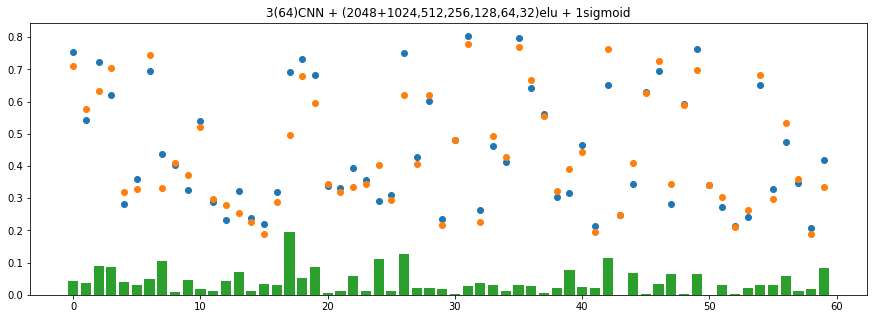

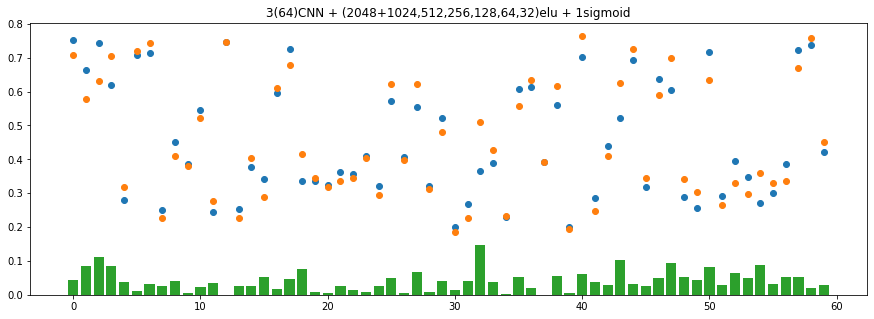

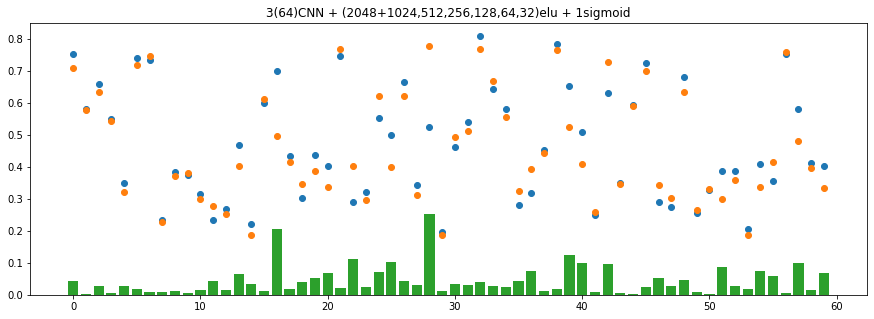

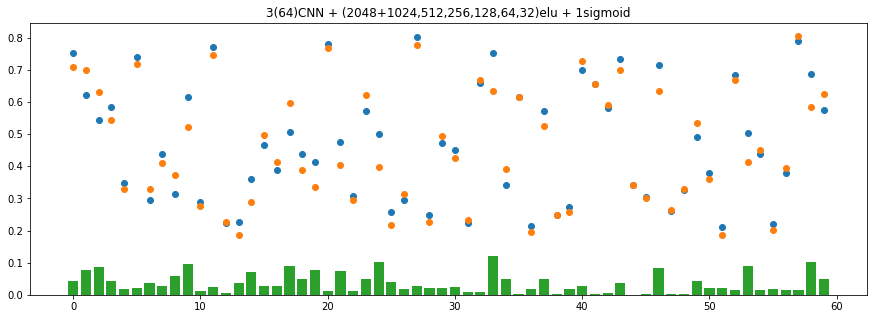

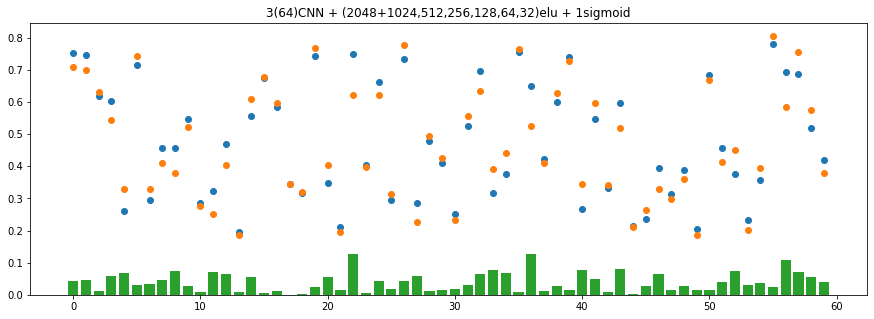

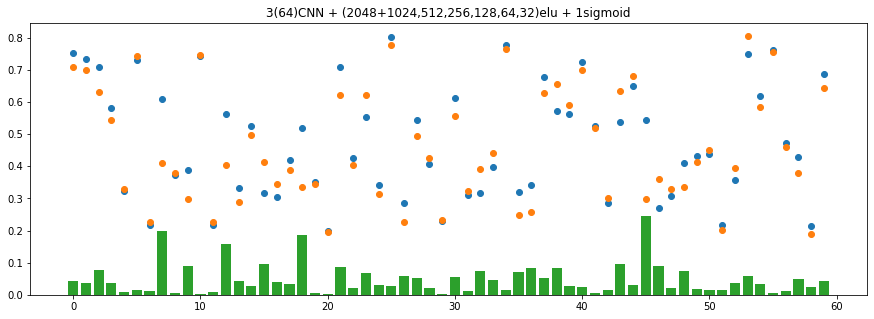

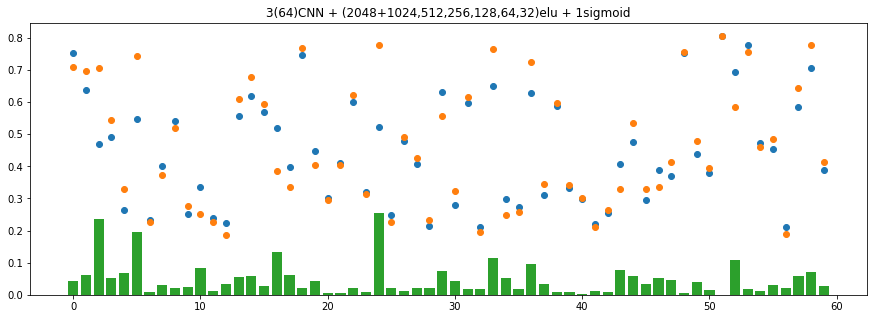

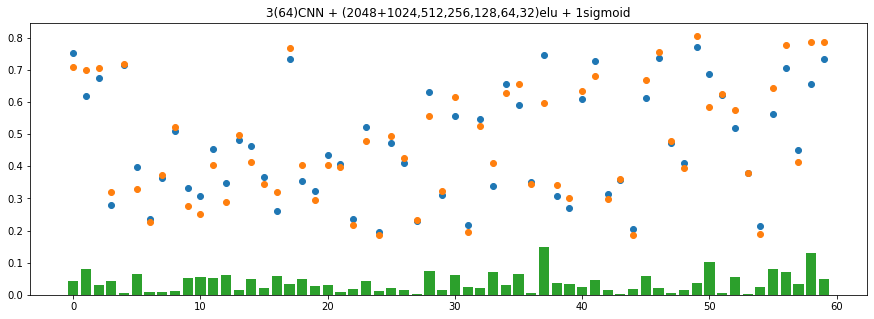

In [37]:
# Comparamos las predicciones con las originales
predictions = model.predict(test_data_new)
x=np.zeros(60)
y=np.zeros(60)
z=np.zeros(60)
for k in range(15,30):
    for i in range (0,60):
      x[i]=i
    for i in range (0,60):
      y[i]=predictions[i*k+5] #cogemos cada 30 predicciones para no tener el mismo defecto.
    for i in range (0,60):
      z[i]=test_solutions_new[i*k+5]
    fig, ax = plt.subplots(figsize = (15, 5))
    plt.title("3(64)CNN + (2048+1024,512,256,128,64,32)elu + 1sigmoid")
    plt.scatter(x,y)
    plt.scatter(x,z)
    plt.bar(x,abs(y-z))
    plt.show()